In [2]:
#import Librerie
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Necessario per la visualizzazione 3D

In [3]:
#recupero il dataset
ds = pd.read_csv("../../data/raw/pendigits.csv")

#estraggo le features e i targets
X = ds.drop(columns = "target")
y = ds["target"]

In [4]:
#faccio tre procedimenti complementari, uno con i dati raw, uno con i dati normalizzati e uno con i dati standardizzati
#inizializzo lo standardizzatore
scaler = StandardScaler()

#standardizzo i dati (media 0 e varianza 1)
X_std = scaler.fit_transform(X)

#normalizzo i dati (valori tra 0 e 1)
X_norm = (X - X.min()) / (X.max() - X.min())

#creo una lista con i tre dataset
datasets = [X, X_std, X_norm]
datasets_names = ["Raw", "Standardized", "Normalized"]

/var/folders/nk/szdff2wj6tvc_kvf5fxnh6n00000gn/T/ipykernel_3923/3359404114.py:18: RuntimeWarning: Mean of empty slice.
  centroids = np.array([reduced_data[labels == cluster].mean(axis=0) for cluster in range(10)])
/Users/alessandrococco/miniconda3/envs/analisi-pendigits/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


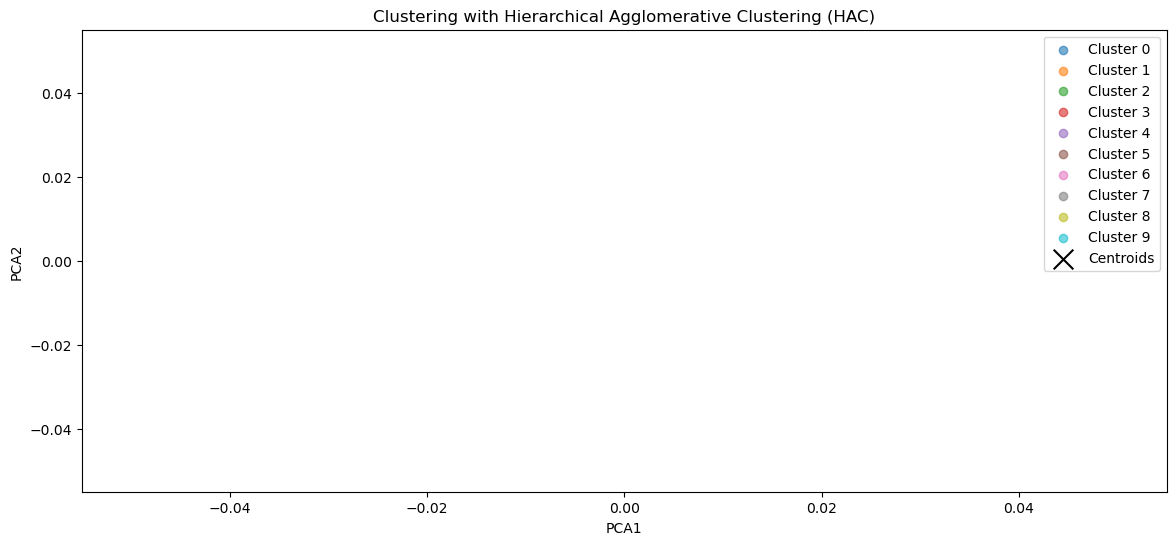

Metriche con Dataset: Raw
ARI: 0.0
NMI: 0.0
Homogeneity: 0.0
Completeness: 1.0
V-Measure: 0.0




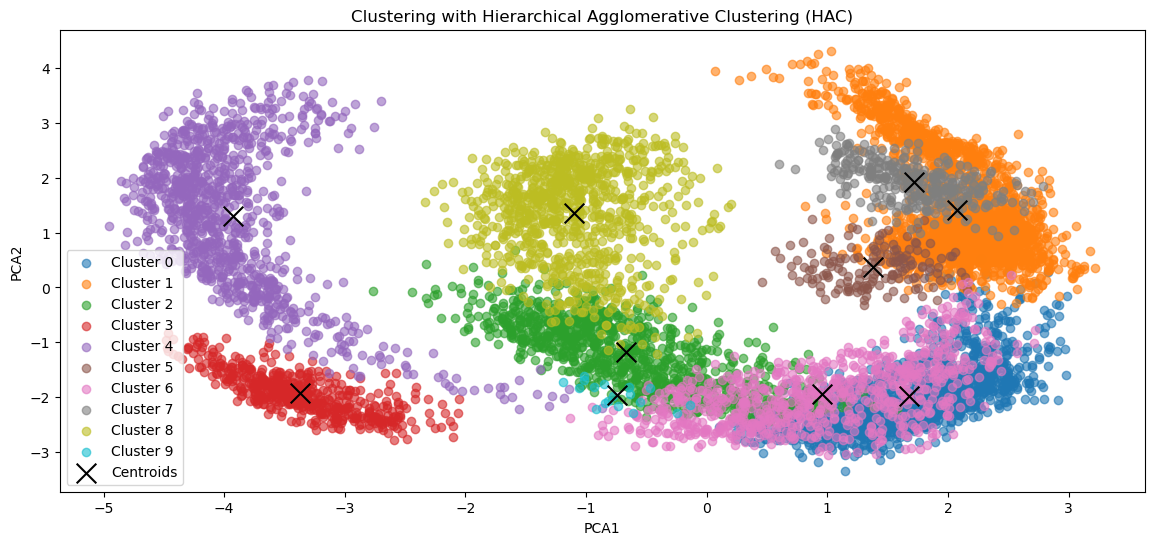

Metriche con Dataset: Standardized
ARI: 0.47873300143984987
NMI: 0.689628633907411
Homogeneity: 0.6763329652206235
Completeness: 0.703457529930739
V-Measure: 0.689628633907411




/var/folders/nk/szdff2wj6tvc_kvf5fxnh6n00000gn/T/ipykernel_3923/3359404114.py:18: RuntimeWarning: Mean of empty slice.
  centroids = np.array([reduced_data[labels == cluster].mean(axis=0) for cluster in range(10)])
/Users/alessandrococco/miniconda3/envs/analisi-pendigits/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


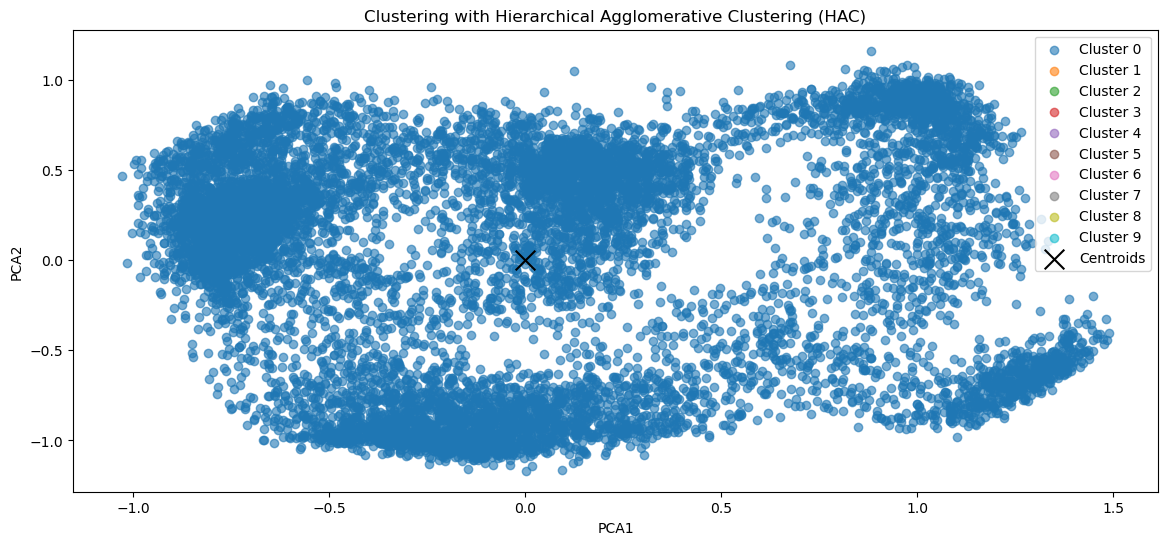

Metriche con Dataset: Normalized
ARI: 0.0
NMI: 0.0
Homogeneity: 0.0
Completeness: 1.0
V-Measure: 0.0




In [7]:
#inizializzo il modello con eps=0.5 e min_samples=5.
#eps è la distanza massima tra due campioni per essere considerati nello stesso cluster
#min_samples è il numero minimo di campioni in un vicinato per essere considerati core point
dbscan = DBSCAN(eps=1, min_samples=10)

#per ogni dataset eseguo il clustering e prendo labels
for i, X in enumerate(datasets):
    
    #eseguo il clustering
    labels = dbscan.fit_predict(X)

    #riduco le dimensioni per poter fare il plot in 2D
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    
    #calcolo i centroidi come media dei punti per ogni cluster
    #per ogni cluster calcolo la media dei punti, prendendo solo i punti del cluster in questione tramite la maschera labels == cluster
    centroids = np.array([reduced_data[labels == cluster].mean(axis=0) for cluster in range(10)])
    
    #creo un dataframe con i dati ridotti e i cluster
    df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = labels
    
    #plotto i dati in 2D con i centroidi
    plt.figure(figsize=(14, 6))
    for cluster in range(10):
        cluster_data = df_pca[df_pca['Cluster'] == cluster]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], 
                    label=f'Cluster {cluster}', 
                    alpha=0.6)
    
    #plotto i centroidi
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='x', 
                s=200, 
                c='black', 
                label='Centroids')
    
    plt.title('Clustering with Hierarchical Agglomerative Clustering (HAC)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()

    #calcolo i valori di similarità
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    hom = homogeneity_score(y, labels)
    comp = completeness_score(y, labels)
    vms = v_measure_score(y, labels)

    print(f"Metriche con Dataset: {datasets_names[i]}")
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")
    print(f"Homogeneity: {hom}")
    print(f"Completeness: {comp}")
    print(f"V-Measure: {vms}")
    print("\n")